In [1]:
import numpy as np
import matplotlib.pyplot as plt
import foolbox
import torch
import random
import sys
from tqdm import tqdm

import viz_2d as viz
import acd
import dset

# %%
import torch.nn as nn
import torch.nn.functional as F

sys.path.append('/umich/Library/Mobile Documents/com~apple~CloudDocs/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')
from model import Cnn, getClassifier
from dataset import handwriting
from acd_exp import AcdExp

In [2]:
model_type = 'mnist'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the dataset

In [4]:
mnist = handwriting('mnist_784', normalize=True)
print(type(mnist), type(mnist.X), type(mnist.y), type(mnist.XCnn))
print(mnist.y)

<class 'dataset.mnist.handwriting'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[5 0 4 ... 4 5 6]


In [5]:
mnist.X.shape, mnist.y.shape, mnist.XCnn.shape

((70000, 784), (70000,), (70000, 1, 28, 28))

# Load CNN

In [6]:
model = Cnn()
checkpoint = torch.load('../../MINST.pkl', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)
model.to(device)

Cnn(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=1600, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (fc1_drop): Dropout(p=0.5, inplace=False)
)

In [7]:
Xsample = torch.tensor(mnist.XCnn[0:1]).to(device)
X_preds = model(Xsample)
Xsample.shape, X_preds.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1, 10]))

# Take out one image

In [8]:
img_ID = 0

In [9]:
image = torch.tensor(mnist.XCnn[img_ID].reshape(-1, 1, 28, 28)).to(device)

In [10]:

ACDexp = AcdExp(image, sweep_dim=1)

In [11]:
image = torch.tensor(mnist.XCnn[0].reshape(-1, 1, 28, 28)).to(device)

In [12]:
image.shape, mnist.y[0]

(torch.Size([1, 1, 28, 28]), 5)

# Load the explanation model

In [13]:
ACDexp = AcdExp(image, sweep_dim=1, device=device)

# Get explanation

In [14]:
scores = ACDexp.get_explanation(model, mnist.y[img_ID])

/home/xiangyu/.conda/envs/PyTc/lib/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/xiangyu/.conda/envs/PyTc/lib/python3.12/site-packages/acd/scores/score_funcs.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(model(input_vecs))[:, class_to_explain]


# Visualize the result

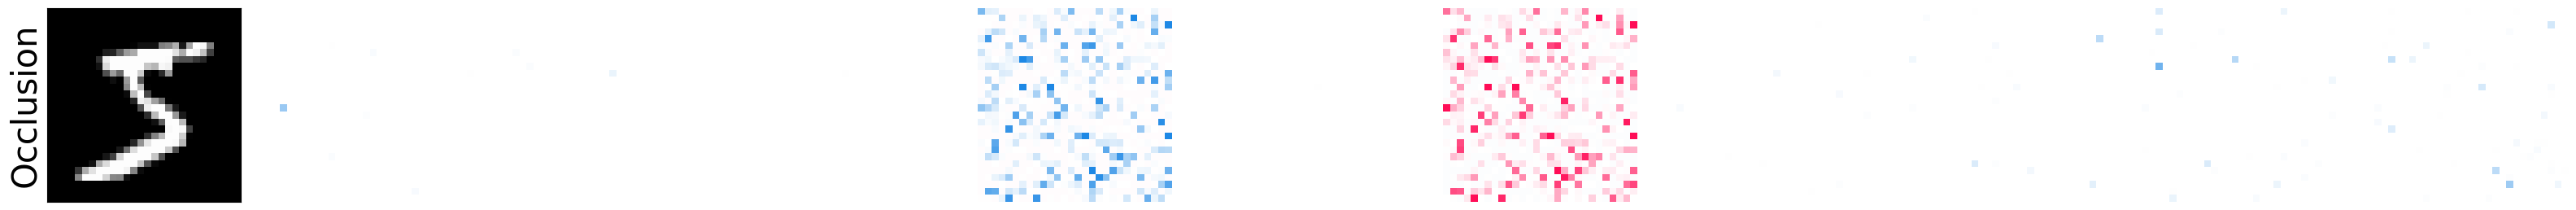

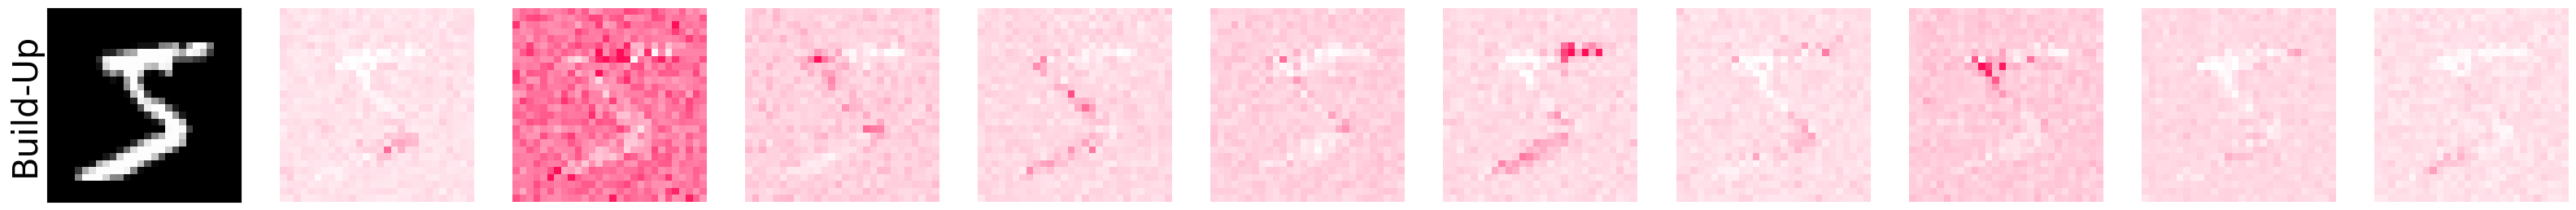

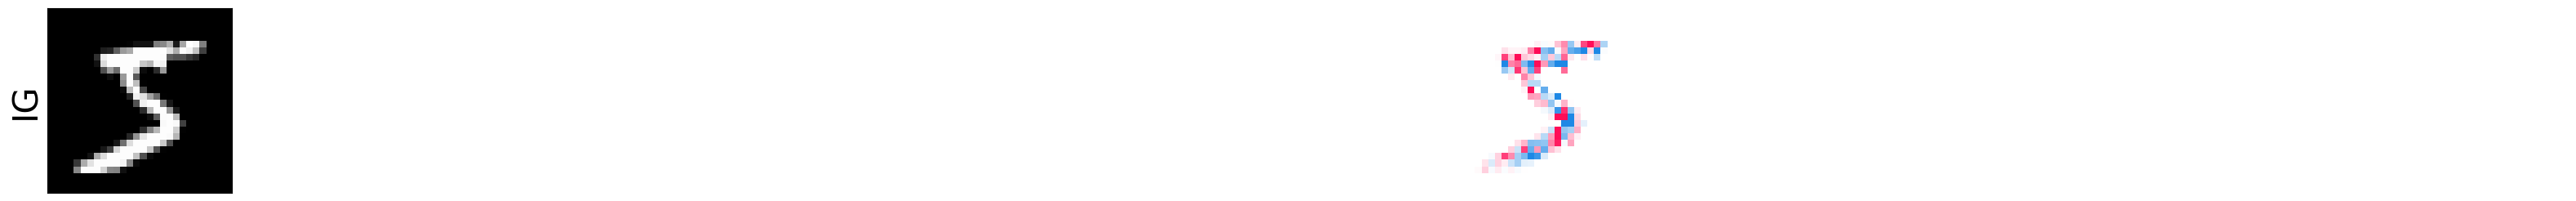

In [15]:
ACDexp.plot_raw_scores(scores)